# Import Library

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [3]:
# Mengimpor dataset MNIST dari pustaka keras
from tensorflow.keras.datasets import mnist

In [4]:
# membuat data untuk pelatihan
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Check shape data
# memanggil dimensi atau ukuran dari matriks gambar
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [6]:
# Check shape labels
# memanggil dimensi atau ukuran dari vektor label
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [7]:
# Check each data shape --> should be 28*28
#  memanggil dimensi atau ukuran dari gambar pertama (indeks ke-0)
train_data[0].shape

(28, 28)

In [8]:
# Check the label
# memanggil dimensi atau ukuran dari vektor label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [9]:
# menggabungkan data dan label dari set pelatihan dan set pengujian
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [10]:
# Check data shape
# memanggil dimensi atau ukuran dari matriks yang telah digabungkan dari hasil sebelumnya
digits_data.shape

(70000, 28, 28)

In [11]:
# Check label shape
# memanggil dimensi atau ukuran dari vektor yang telah digabungkan dari hasil sebelumnya
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 3')

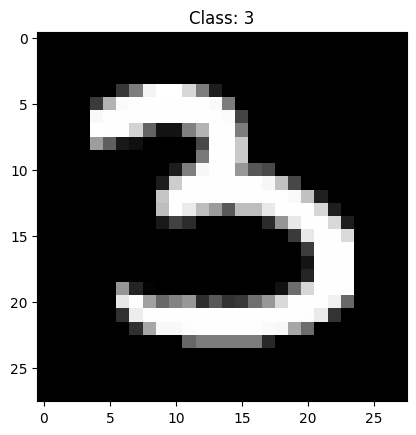

In [12]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) # menghasilkan indeks acak dari dataset
plt.imshow(digits_data[idx], cmap='gray') # menampilkan gambar yang dipilih dari sebelumnya
plt.title('Class: ' + str(digits_labels[idx])) # Menambahkan judul pada gambar

<Axes: xlabel='Labels', ylabel='count'>

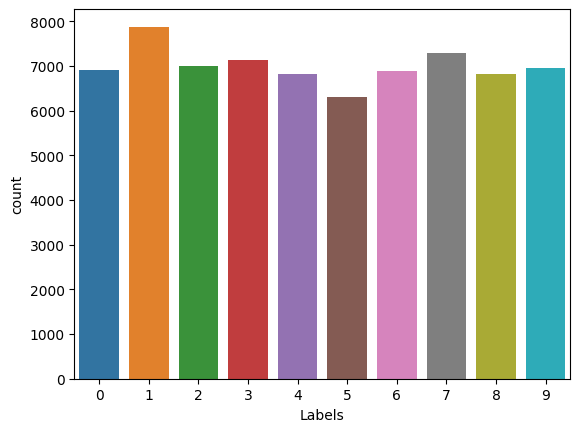

In [13]:
# Check data distribution
# Membuat DataFrame Pandas dari vektor digits_labels
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [14]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-01 05:50:45--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   161MB/s    in 1.1s    

2023-12-01 05:50:47 (161 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [15]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # membuat objek zip_object menggunakan kelas ZipFile
zip_object.extractall('./') # mengekstrak semua file dan direktori dari file ZIP ke direktori saat ini
zip_object.close() #  menutup objek zip_object setelah selesai menggunakan file ZIP

In [16]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # mengonversi seluruh nilai dalam dataset menjadi tipe data float32.
dataset_az # menampilkan DataFrame Pandas yang berisi data dari file CSV.

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1) # menghasilkan DataFrame alphabet_data dengan menghapus kolom dengan label '0'
# Get labels only
alphabet_labels = dataset_az['0'] # menghasilkan vektor alphabet_labels yang berisi label dari dataset

In [18]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape # memanggil dimensi atau ukuran dari DataFrame dan vektor

((372450, 784), (372450,))

In [19]:
# Check shape labels
alphabet_labels.shape # mengembalikan tuple yang berisi informasi tentang dimensi atau ukuran vektor label

(372450,)

In [20]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28)) # mengubah bentuk data alphabet_data.values
# Check the result by its shape
alphabet_data.shape # memeriksa dimensi baru dari 'alphabet_data'

(372450, 28, 28)

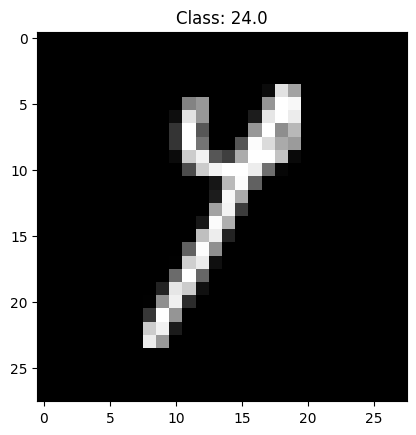

In [21]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0]) # menghasilkan indeks acak dari jumlah sampel dan memberikan jumlah sampel atau gambar dalam dataset
plt.imshow(alphabet_data[index], cmap = 'gray') # menampilkan gambar yang dipilih dari 'alphabet_data'
plt.title('Class: ' + str(alphabet_labels[index])); # menambahkan judul pada gambar

<Axes: xlabel='Labels', ylabel='count'>

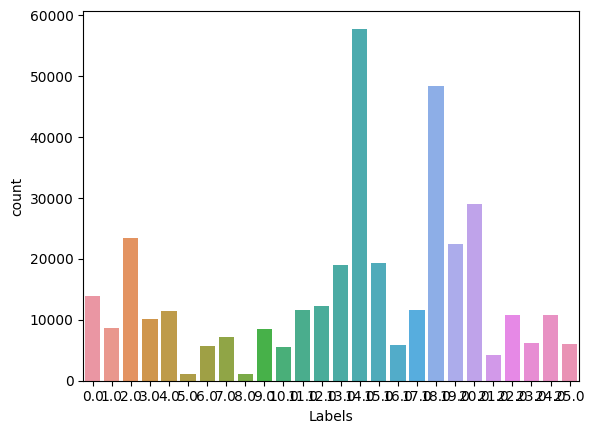

In [22]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
}) # membuat DataFrame Pandas baru 'df_az_labels' dengan satu kolom bernama 'Labels', yang diisi dengan nilai dari vektor 'alphabet_labels'
sns.countplot(df_az_labels, x='Labels') # membuat count plot dari distribusi kelas dalam DataFrame 'df_az_labels'

## Combine Dataset (MNIST + Kaggel A-Z)

In [23]:
# Check unique value from digits_labels
np.unique(digits_labels) # mengembalikan nilai-nilai unik yang terdapat dalam vektor 'digits_labels'

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [24]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels) # mengembalikan nilai-nilai unik yang terdapat dalam vektor 'alphabet_labels'

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [25]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10 # menambahkan nilai 10 ke setiap elemen dalam vektor alphabet_labels

In [26]:
# check alphabet labels again
np.unique(alphabet_labels) # mengembalikan kembali nilai-nilai yang terdapat di dalam vektor 'alphabet_labels'

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [27]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # menggabungkan (vertikal) data gambar dari dataset alfabet A-Z dan dataset digits
labels = np.hstack([alphabet_labels, digits_labels]) # menggabungkan (horizontal) label-label dari dataset alfabet A-Z dan dataset digits.

In [28]:
# Check the shape
data.shape, labels.shape # Mengembalikan tuple yang berisi informasi tentang dimensi, ukuran matriks dan ukuran vektor data

((442450, 28, 28), (442450,))

In [29]:
# Check labels
np.unique(labels) # mengembalikan nilai-nilai unik yang terdapat dalam vektor 'labels'

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [30]:
# Convert data to float32
data = np.array(data, dtype = 'float32') # mengubah tipe data dari elemen-elemen dalam matriks data menjadi float32.

In [31]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1) # menambah dimensi baru pada matriks 'data'

# check shape
data.shape # Menggunakan atribut shape untuk memeriksa dimensi baru dari 'data'

(442450, 28, 28, 1)

# Preprocessing

In [32]:
# Normalize data
data /= 255.0 # normalisasi data

In [33]:
# Check range value of data
data[0].min(), data[0].max() # menemukan nilai minimum dan maksimum dari piksel-piksel dalam gambar pertama (indeks ke-0)

(0.0, 1.0)

In [34]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer() # mengubah label menjadi representasi biner.
labels = le.fit_transform(labels) # mentransformasikan vektor label 'labels' menjadi representasi biner

In [35]:
# Check labels shape
labels.shape #  mengembalikan tuple yang berisi informasi tentang dimensi atau ukuran dari vektor hasil transformasi label.

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

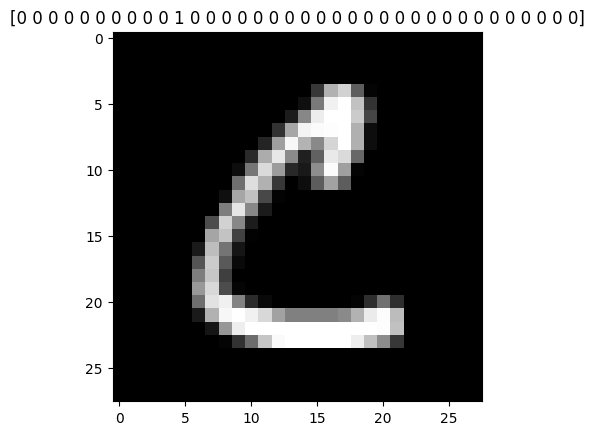

In [36]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray') # menampilkan gambar yang terdapat pada indeks ke-30000
plt.title(str(labels[0])) # menambahkan judul pada gambar

In [37]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0) # menghitung jumlah total masing-masing kelas atau label dalam dataset setelah transformasi one-hot encoding
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [38]:
# Check the biggest value of data
classes_total.max() # menemukan nilai maksimum dari array 'classes_total'

57825

In [39]:
# Create a weight for each data
classes_weights = {} # Membuat kamus (dictionary)
for i in range(0, len(classes_total)): # menggunakan loop for untuk iterasi melalui setiap kelas (kolom) dalam array 'classes_total'
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i] # menghitung bobot untuk setiap kelas

# Check the weight for each data
classes_weights # mengembalikan kamus 'classes_weights' yang berisi bobot untuk setiap kelas.

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)
# membagi dataset menjadi dua bagian: satu untuk pelatihan (train) dan satu untuk pengujian (test)

## Create Data Augmentation

In [41]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)
# melakukan augmentasi data pada gambar-gambar dalam proses pelatihan model.

# Build CNN Model

In [43]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [44]:
# Build the network
network = Sequential() # membuat model neural network berbasis Sequential

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # menambahkan lapisan konvolusi 2D dengan 32 filter, kernel size 3x3, fungsi aktivasi ReLU, dan bentuk input (input_shape) sebesar (28,28,1)
network.add(MaxPool2D(pool_size=(2,2))) # menambahkan lapisan pooling (max pooling) dengan ukuran pooling 2x2 setelah lapisan konvolusi pertama.

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')) # menambahkan lapisan konvolusi kedua dengan 64 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding yang sama
network.add(MaxPool2D(pool_size=(2,2))) # menambahkan lapisan pooling (max pooling) setelah lapisan konvolusi kedua.

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid')) # menambahkan lapisan konvolusi ketiga dengan 128 filter, kernel size 3x3, fungsi aktivasi ReLU, dan padding 'valid'
network.add(MaxPool2D(pool_size=(2,2))) # menambahkan lapisan pooling (max pooling) setelah lapisan konvolusi ketiga.

network.add(Flatten()) # menambahkan lapisan flatten untuk mengubah data ke dalam bentuk vektor sebelum masuk ke lapisan fully connected.

network.add(Dense(64, activation = 'relu')) # menambahkan lapisan fully connected dengan 64 neuron dan fungsi aktivasi ReLU.
network.add(Dense(128, activation = 'relu')) # menambahkan lapisan fully connected dengan 128 neuron dan fungsi aktivasi ReLU.

network.add(Dense(36, activation='softmax')) # menambahkan lapisan fully connected dengan 36 neuron (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax.

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # mengkompilasi model dengan fungsi kerugian categorical crossentropy, pengoptimal Adam, dan metrik akurasi

In [45]:
# Check network summary
network.summary() # menampilkan ringkasan (summary) dari arsitektur model neural network yang telah didefinisikan

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [46]:
# Create actual labels
name_labels = '0123456789' # inisialisasi variabel 'name_labels' dengan karakter digit (0-9).
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # menambahkan karakter huruf kapital (A-Z) ke dalam variabel 'name_labels'
name_labels = [l for l in name_labels] # membuat list dari karakter-karakter dalam 'name_labels'

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [47]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' # menetapkan nama file atau path untuk menyimpan model setelah pelatihan
epochs = 20 # menetapkan jumlah epoch, yaitu jumlah kali seluruh dataset akan digunakan dalam pelatihan
batch_size = 128 # menetapkan ukuran batch, yaitu jumlah sampel yang akan digunakan dalam satu iterasi pelatihan

In [48]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)
# membuat objek ModelCheckpoint yang akan memantau nilai 'val_loss' (kerugian pada dataset pengujian) selama pelatihan

In [76]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])
# melatih model neural network dengan data augmentasi menggunakan fungsi fit dari Keras

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.3932 - accuracy: 0.9514
Epoch 1: val_loss did not improve from 0.14056
2765/2765 [==============================] - 133s 48ms/step - loss: 0.3931 - accuracy: 0.9514 - val_loss: 0.1577 - val_accuracy: 0.9433
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.3910 - accuracy: 0.9519
Epoch 2: val_loss did not improve from 0.14056
2765/2765 [==============================] - 127s 46ms/step - loss: 0.3910 - accuracy: 0.9519 - val_loss: 0.1530 - val_accuracy: 0.9371
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.9516
Epoch 3: val_loss improved from 0.14056 to 0.12914, saving model to custom_ocr.model
2765/2765 [==============================] - 127s 46ms/step - loss: 0.3941 - accuracy: 0.9516 - val_loss: 0.1291 - val_accuracy: 0.9605
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.9526
Epoch 4: val_loss did

# Evaluate Model

## Make a Single Prediction

In [50]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)
# prediksi menggunakan model neural network pada dataset pengujian 'X_test'

692/692 [==============================] - 2s 2ms/step


In [51]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1] # mengakses hasil prediksi untuk sampel pertama (indeks ke-1)

array([4.5479084e-16, 4.0495354e-11, 1.3070427e-12, 9.2574489e-18,
       7.4675692e-14, 4.1360368e-10, 2.1974565e-15, 1.6714356e-13,
       5.0531981e-17, 4.5523023e-15, 1.3209579e-11, 4.7453859e-12,
       2.0669329e-10, 5.2005470e-12, 2.2907563e-09, 8.5825397e-10,
       3.4401999e-11, 1.3950294e-10, 9.9999666e-01, 3.0940878e-06,
       2.1704509e-12, 7.3085609e-08, 1.4799212e-12, 2.8728460e-13,
       1.2728813e-13, 2.6922917e-12, 4.8866987e-13, 2.2802686e-12,
       1.8028100e-11, 1.1781271e-07, 5.9687771e-10, 1.3972940e-16,
       2.1673954e-14, 5.7841110e-10, 1.1817250e-12, 3.9949342e-08],
      dtype=float32)

In [52]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # mengambil indeks dengan nilai maksimum dari array 'predictions[1]'

18

In [53]:
# Check label for 24
name_labels[18] # mengakses elemen ke-18 dari list 'name_labels'

'I'

In [54]:
# Check y_test label for 0
y_test[1] # Mengakses label sebenarnya dari sampel pertama dalam dataset pengujian.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# check the highest value
np.argmax(y_test[1]) # mengambil indeks dengan nilai maksimum dari array 'y_test[1]'

18

In [56]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])] # mengakses karakter yang sesuai dengan kelas sebenarnya dari sampel ke-18 dalam dataset pengujian

'S'

## Make an Evaluation on Test Data

In [57]:
# Evaluate on test data
network.evaluate(X_test, y_test) # mengevaluasi kinerja model pada dataset pengujian

2766/2766 [==============================] - 12s 4ms/step - loss: 0.1417 - accuracy: 0.9556


[0.1417119801044464, 0.9555655717849731]

In [77]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))
# mencetak laporan klasifikasi yang menyediakan informasi rinci tentang kinerja model

              precision    recall  f1-score   support

           0       0.48      0.41      0.44      1381
           1       0.97      0.99      0.98      1575
           2       0.89      0.97      0.93      1398
           3       0.99      0.97      0.98      1428
           4       0.94      0.96      0.95      1365
           5       0.64      0.93      0.75      1263
           6       0.96      0.97      0.96      1375
           7       0.94      0.98      0.96      1459
           8       0.98      0.97      0.98      1365
           9       0.99      0.97      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.99      0.98      1734
           C       0.99      0.97      0.98      4682
           D       0.88      0.97      0.92      2027
           E       0.98      0.99      0.99      2288
           F       0.90      1.00      0.95       233
           G       0.96      0.96      0.96      1152
           H       0.98    

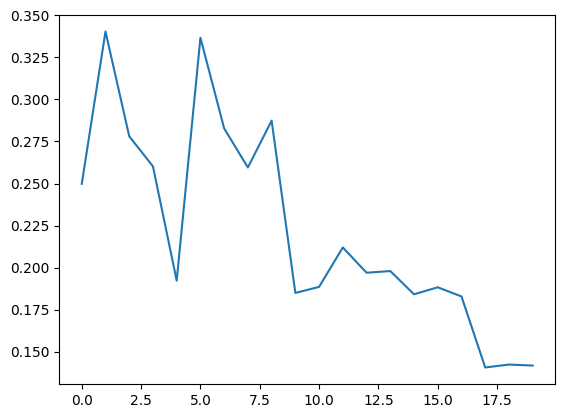

In [59]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])
# menggambar atau memplot kurva kerugian pada dataset pengujian selama pelatihan model

In [60]:
# You can also check the another metrics
history.history.keys()
# mengakses kunci-kunci 'keys' yang tersedia dalam objek history setelah pelatihan model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

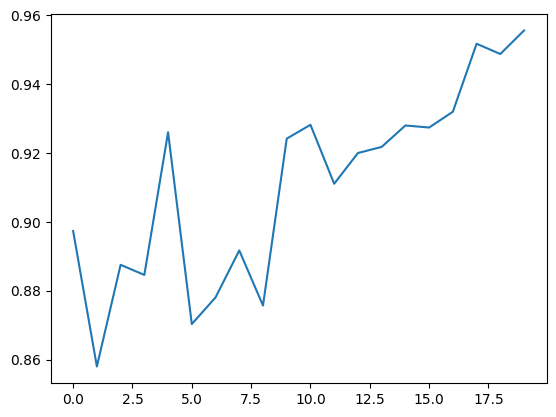

In [61]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])
# menggambar atau memplot kurva akurasi pada dataset pengujian selama pelatihan model

# Save The Model

In [62]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# menyimpan seluruh model neural network ke dalam file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [63]:
# Import library
from tensorflow.keras.models import load_model
# mengimpor fungsi load_model dari modul 'models'

In [64]:
# Load saved network
load_network = load_model('network')
# load model neural network yang telah disimpan sebelumnya ke dalam variabel 'load_network'

In [65]:
# Check summary
load_network.summary()
# menampilkan ringkasan (summary) dari arsitektur model neural network yang telah dimuat kembali ke dalam variabel 'load_network'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

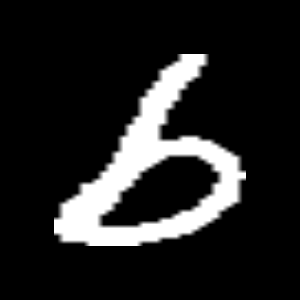

In [67]:
# Load Image
# menampilkan image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [68]:
# Check shape
img.shape
# mendapatkan bentuk (shape) dari suatu array atau tensor 'img'

(300, 300, 3)

In [69]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

# konversi warna citra dari format BGR (Blue, Green, Red) ke citra keabuan (grayscale) menggunakan OpenCV

(300, 300)

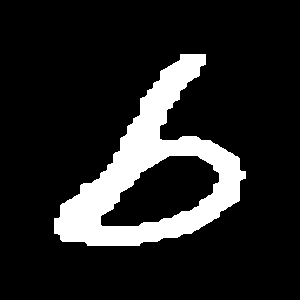

120.0


In [70]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)
# segmentasi citra menggunakan metode thresholding otomatis Otsu

In [71]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)
# resize citra keabuan 'gray_img' menjadi ukuran yang lebih kecil, yaitu 28x28 piksel

In [72]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape
# mengubah tipe data citra 'img_resize' menjadi 'float32'
# melakukan normalisasi nilai piksel
# menambah dimensi kedalaman (depth) ke citra

(28, 28, 1)

In [73]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape
# reshape citra input 'img_input' menjadi bentuk yang sesuai untuk dimasukkan ke dalam model neural network

(1, 28, 28, 1)

In [74]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label
# prediksi menggunakan model neural network yang telah dimuat kembali 'load_network' pada citra input 'img_input'

1/1 [==============================] - 0s 164ms/step


6

In [75]:
# check label for 6
name_labels[6]
# mengakses label kelas yang sesuai dengan indeks ke-6

'6'